In [5]:
import numpy as np
import emcee
import corner

In [6]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [7]:
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [8]:
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

In [9]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

In [10]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [11]:
sampler.run_mcmc(state, 10000);

In [12]:
samples = sampler.get_chain(flat=True)

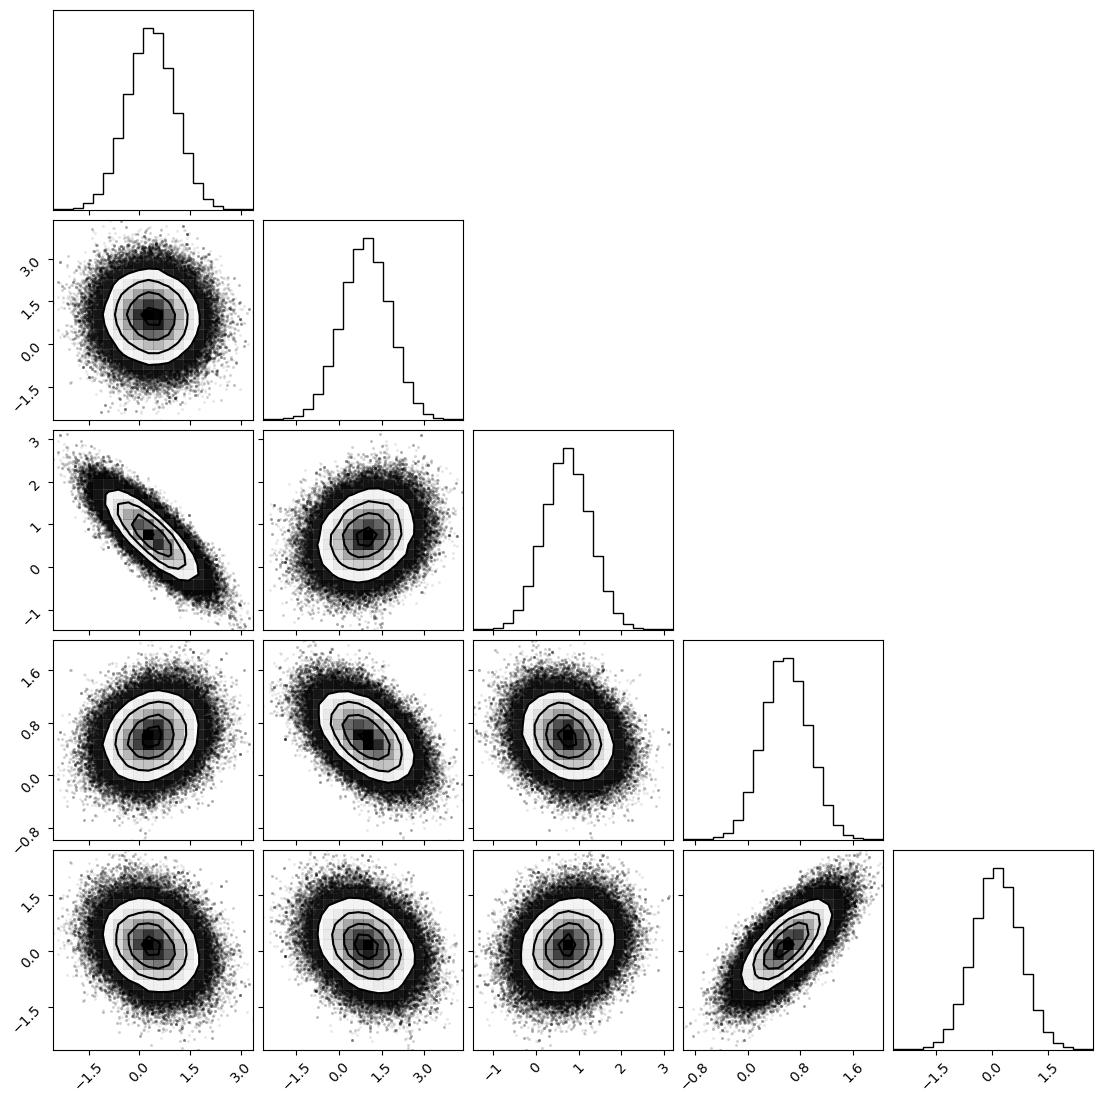

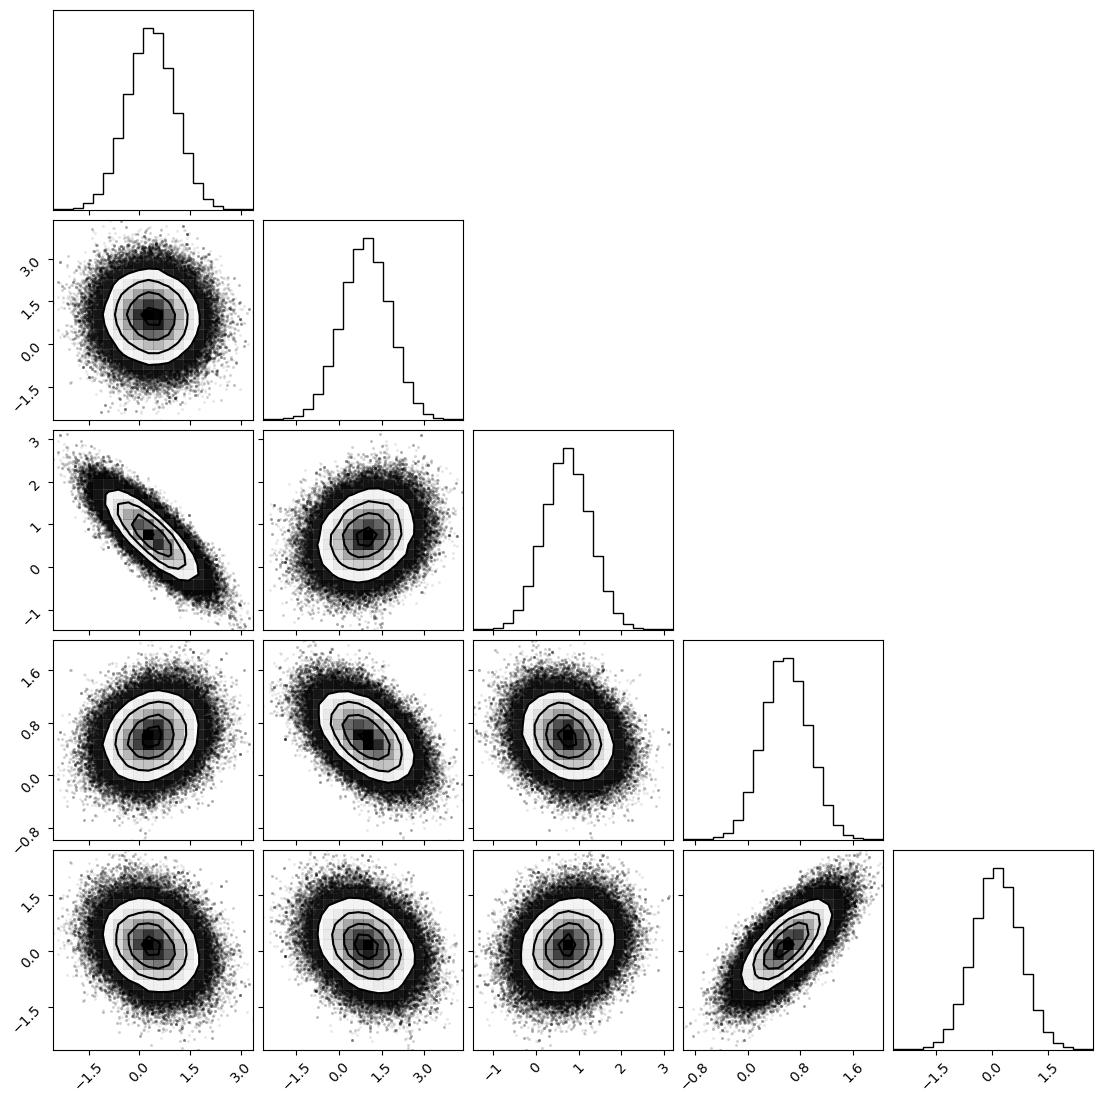

In [13]:
corner.corner(samples)

In [14]:
from multiprocessing import Pool

with Pool() as pool:

SyntaxError: incomplete input (4271481186.py, line 3)